# Extract and Visualize Heartbeats (QRS)

This example shows how to use NeuroKit to extract and visualize the QRS complexes (individual heartbeats) from an electrocardiogram (ECG).


## Extract the cleaned ECG signal

In this example, we will use a simulated ECG signal. However, you can use any of your signal (for instance, extracted from the dataframe using the [read_acqknowledge()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.read_acqknowledge>).


In [40]:
# Load the NeuroKit package and packages for interactive controls
import neurokit2 as nk
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Simulate 30 seconds of ECG Signal (recorded at 250 samples / second)
ecg_signal = nk.ecg_simulate(duration=30, sampling_rate=250)

Once you have a raw ECG signal in the shape of a vector (i.e., a one-dimensional array), or a list, you can use [ecg_process()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_process>) to process it.


In [41]:
# Automatically process the (raw) ECG signal
signals, info = nk.ecg_process(ecg_signal, sampling_rate=250)

It is critical that you specify the correct sampling rate of your signal throughout many processing functions, as this allows NeuroKit to understand the signal in term of actual time.

This function outputs two elements, a *dataframe* containing the different signals (raw, cleaned, etc.) and a *dictionary* containing various additional information (peaks location, ...).

## Extract R-peaks location


The processing function does two important things for our purpose: 1) it cleans the signal and 2) it detects the location of the R-peaks. Let's extract these from the output.


In [42]:
# Extract clean ECG and R-peaks location
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]

Great. We can visualize the R-peaks location in the signal to make sure it got detected correctly by marking their location in the signal.

<IPython.core.display.Javascript object>


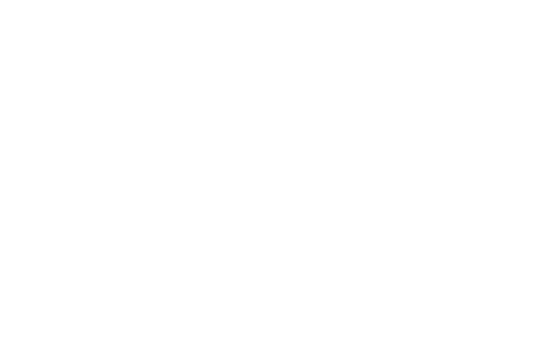

<IPython.core.display.Javascript object>


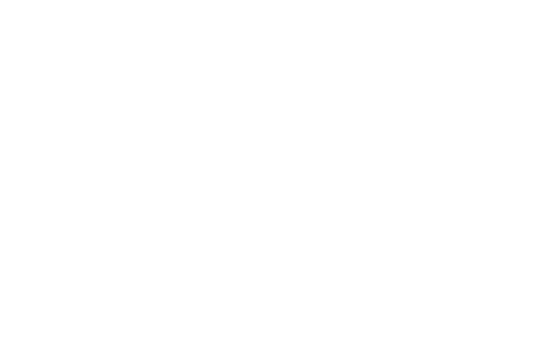

In [43]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks, cleaned_ecg)

## Create segments of signal around the heart beats



Once that we know where the R-peaks are located, we can create windows of signal around them (of a length of for instance 1 second, ranging from 400 ms before the R-peak), which we can refer to as *epochs*.


In [44]:
# Segment the signal around the R-peaks
epochs = nk.epochs_create(cleaned_ecg, events=rpeaks, sampling_rate=250, epochs_start=-0.4, epochs_duration=1)


This create a dictionary of dataframes for each 'epoch' (in this case, each heart beat).
    

## Visualize all the heartbeats segments


You can now plot all these individual heart beats, synchronized by their R peaks with the [epochs_plot()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.epochs_plot) function.


<IPython.core.display.Javascript object>


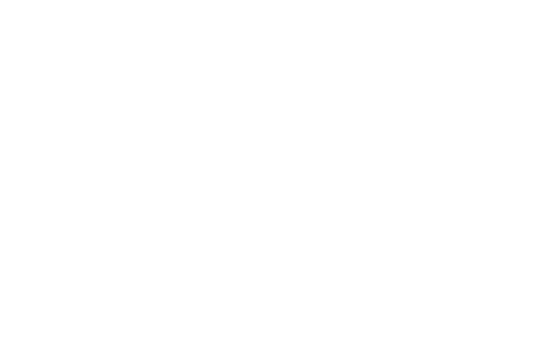

<IPython.core.display.Javascript object>


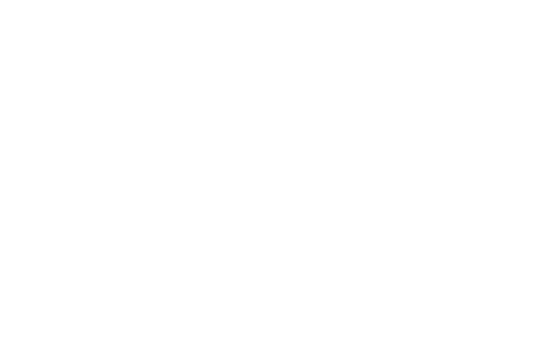

In [45]:
# Plotting all the heart beats
plot = nk.epochs_plot(epochs, legend=False)

## *Advanced Plotting: Addition of Aesthetics*

This section is written for a more advanced purpose of plotting and visualizing all the heartbeats segments. The code below uses packages other than *Neurokit2* to manually set the colour gradient of the signals and to create a more interactive experience for the user - by hovering your cursor over each signal, an annotation of the signal corresponding to the channel is shown.

<IPython.core.display.Javascript object>


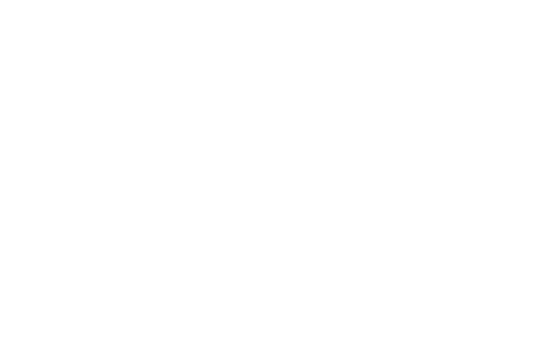

Text(0.5, 0, 'Time (seconds)')

In [46]:
# Import dependencies
import matplotlib.pyplot as plt
import mplcursors
import numpy as np
import pandas as pd

# Prepare figure
fig, ax = plt.subplots()
plt.close(fig)
ax.set_title("Individual Heart Beats")
ax.set_xlabel("Time (seconds)")

Here, we define a function to create the epochs. It takes in `cleaned` as the cleaned signal dataframe, and `peaks` as the array of R-peaks locations.

In [47]:
# Define a function to create epochs
def _epochs_plot_heartbeats(cleaned, peaks, sampling_rate=None): 
    heartbeats = nk.epochs_create(cleaned, events=peaks, epochs_duration=0.7, epochs_start=-0.3, sampling_rate=sampling_rate)
    heartbeats = nk.epochs_to_df(heartbeats)
    return heartbeats
heartbeats = _epochs_plot_heartbeats(cleaned_ecg, peaks=rpeaks, sampling_rate=250)
heartbeats.head()

,Signal,Index,Label,Time
0,-0.202882,137,1,-0.300000
1,-0.199760,138,1,-0.295977
2,-0.195982,139,1,-0.291954
3,-0.191289,140,1,-0.287931
4,-0.185511,141,1,-0.283908


We then pivot the dataframe so that each column corresponds to the signal values of one channel, or *Label*.

In [48]:
heartbeats_pivoted = heartbeats.pivot(index='Time', columns='Label', values='Signal')
heartbeats_pivoted.head()

Label,1,10,11,12,13,14,15,16,17,18,...,31,32,33,34,4,5,6,7,8,9
Time,,,,,,,,,,,,,,,,,,,,,
-0.300000,-0.202882,-0.127703,-0.136561,-0.136647,-0.138130,-0.135015,-0.139719,-0.140099,-0.130211,-0.113041,...,-0.123810,-0.155464,-0.074443,-0.277349,-0.116871,-0.142590,-0.138150,-0.132585,-0.127817,-0.133956
-0.295977,-0.199760,-0.135962,-0.132016,-0.138194,-0.137308,-0.132403,-0.140729,-0.139668,-0.124908,-0.124279,...,-0.119746,-0.154545,-0.068656,-0.270208,-0.116623,-0.143678,-0.136399,-0.127646,-0.125984,-0.135089
-0.291954,-0.195982,-0.143298,-0.127671,-0.139915,-0.138966,-0.130974,-0.139561,-0.138192,-0.119751,-0.128179,...,-0.121037,-0.156145,-0.064716,-0.263442,-0.115606,-0.141984,-0.134440,-0.126735,-0.125653,-0.134477
-0.287931,-0.191289,-0.143578,-0.125946,-0.136460,-0.140264,-0.130232,-0.136560,-0.133707,-0.117471,-0.125005,...,-0.124141,-0.155758,-0.068360,-0.259814,-0.113560,-0.141066,-0.133314,-0.129138,-0.126965,-0.128909
-0.283908,-0.185511,-0.137295,-0.128277,-0.128489,-0.137092,-0.129590,-0.132402,-0.126560,-0.120330,-0.120112,...,-0.124999,-0.152951,-0.077084,-0.259199,-0.111385,-0.142166,-0.132247,-0.130966,-0.129911,-0.122582


This section of the code incorporates the aesthetics and interactivity of the plot produced. As you hover your cursor over each signal, annotation of the channel that produced it is shown.

<IPython.core.display.Javascript object>


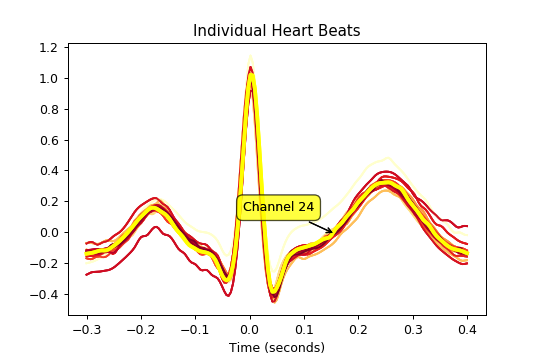

In [51]:
%matplotlib notebook

# Aesthetics
labels = list(heartbeats_pivoted)
labels = ['Channel ' + x for x in labels] # Set labels for each signal
cmap = iter(plt.cm.YlOrRd(np.linspace(0,1, int(heartbeats["Label"].nunique())))) # Get color map
lines = [] # Create empty list to contain the plot of each signal

for i, x, color in zip(labels, heartbeats_pivoted, cmap):
    line, = ax.plot(heartbeats_pivoted[x], label='%s' % i, color=color)
    lines.append(line)

# Obtain hover cursor
mplcursors.cursor(lines, hover=True, highlight=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label())) 
# Return figure
fig